# PARTIE II : Autistic Spectrum Disorder (ASD) 

### Introduction 

Le jeu de données qui est soumis à notre analyse s’articule autour de la maladie d'Autistic Spectrum.La maladie d'Autistic Spectrum est un trouble du développement neurologique associé à des coûts de soins de santé importants, et un diagnostic précoce peut les réduire considérablement.
Dans l'étude de cette maladie, nous utilisons un DataSet(Autism-Adult-Data) qui collecte un ensemble de données lié au dépistage de l'autisme chez les adultes, qui contient 20 caractéristiques à utiliser pour une analyse plus approfondie, notamment pour déterminer les traits autistiques influents et améliorer la classification des cas de TSA. Dans cet ensemble de données, nous enregistrons dix caractéristiques comportementales (AQ-10-Adult) plus dix caractéristiques individuelles qui se sont avérées efficaces pour détecter les cas de TSA par rapport aux témoins dans les sciences du comportement.

## Importation des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

## Chargement des données

In [2]:
df = pd.read_csv('Autism-Adult-Data.csv')

In [3]:
df.head() 

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,NO


In [4]:
df.tail()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7,'18 and more',Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3,'18 and more',Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,?,no,no,Russia,no,7,'18 and more',?,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,'South Asian',no,no,Pakistan,no,6,'18 and more',Self,NO
703,1,0,1,1,1,0,1,1,1,1,...,f,White-European,no,no,Cyprus,no,8,'18 and more',Self,YES


# Exploration des données

## Analyse statistique descriptive du jeu de données

Dans cette section, nous donnons une vue d’ensemble sur les données en mettant en exergue certaines mesures
comme la moyenne, l’ecart type, les quartiles, etc. Nous regardons aussi l’existence de valeurs nulles dans l’ensemble
de données.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         704 non-null    int64 
 1   A2_Score         704 non-null    int64 
 2   A3_Score         704 non-null    int64 
 3   A4_Score         704 non-null    int64 
 4   A5_Score         704 non-null    int64 
 5   A6_Score         704 non-null    int64 
 6   A7_Score         704 non-null    int64 
 7   A8_Score         704 non-null    int64 
 8   A9_Score         704 non-null    int64 
 9   A10_Score        704 non-null    int64 
 10  age              704 non-null    object
 11  gender           704 non-null    object
 12  ethnicity        704 non-null    object
 13  jundice          704 non-null    object
 14  austim           704 non-null    object
 15  contry_of_res    704 non-null    object
 16  used_app_before  704 non-null    object
 17  result           704 non-null    in

In [6]:
df.shape

(704, 21)

Notre jeu de données présente 704 instances et 21 colones dont les 11 (A1_Score, A2_Score, A3_Score, A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score et result) sont des valeurs numeriques (int64) et les 10 sont des objets.
On peut egalement s'apercevoir que le jeu de donnees ne presente pas de valeurs nulles.

In [7]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


- Pour les colonnes A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score on note une dispersion trés faible  des donnees par rapport à la moyenne.
- Par rapport aux quartiles, la repartition des donnees est quasiment homogène selon les colonnes. En effet, pour la colonne A1_Score on note plus une repartition assez homogene des donnees sur q1, q2 et q3 avec une des proportions invariantes de q1, q2 et q3.
- S'agissant de la moyenne, Il est notable de remarquer l'heterogeneité tres faible des echelles. En effet, la moyenne des colonnes du dataset sont tres proches ainsi, un travail de normalisation sera fait pour homogeiniser totalement les echelles

In [8]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
A1_Score,1.000000,0.011539,0.074096,0.127814,0.169369,0.110199,0.217538,0.147640,0.145452,0.118413,0.397454
A2_Score,0.011539,1.000000,0.223921,0.158998,0.153821,0.185864,-0.041768,0.035408,0.205421,0.068883,0.392540
A3_Score,0.074096,0.223921,1.000000,0.412722,0.264927,0.268846,0.078216,0.017771,0.315113,0.168454,0.552356
A4_Score,0.127814,0.158998,0.412722,1.000000,0.306806,0.295152,0.151236,0.008617,0.327673,0.210968,0.586025
A5_Score,0.169369,0.153821,0.264927,0.306806,1.000000,0.392354,0.238589,0.102086,0.396582,0.267561,0.639706
A6_Score,0.110199,0.185864,0.268846,0.295152,0.392354,1.000000,0.175489,0.100123,0.479422,0.294435,0.630012
A7_Score,0.217538,-0.041768,0.078216,0.151236,0.238589,0.175489,1.000000,0.085403,0.189480,0.252107,0.454848
A8_Score,0.147640,0.035408,0.017771,0.008617,0.102086,0.100123,0.085403,1.000000,0.101733,0.100782,0.324020
A9_Score,0.145452,0.205421,0.315113,0.327673,0.396582,0.479422,0.189480,0.101733,1.000000,0.283340,0.661205
A10_Score,0.118413,0.068883,0.168454,0.210968,0.267561,0.294435,0.252107,0.100782,0.283340,1.000000,0.537205


- D'apres notre matrice de correlation, nous constatons une forte correlation entre les colonnes A1_Score, A2_Score, A3_Score, A4_Score, A5_Score et la variable result ce qui explique une relation determinant entre ces variables.  

In [9]:
Male_Filters = df["gender"] == "m"
df[Male_Filters]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
5,1,1,1,1,1,0,1,1,1,1,...,m,Others,yes,no,'United States',no,9,'18 and more',Self,YES
7,1,1,1,1,0,0,0,0,1,0,...,m,White-European,no,no,'New Zealand',no,5,'18 and more',Parent,NO
8,1,1,0,0,1,0,0,1,1,1,...,m,White-European,no,no,'United States',no,6,'18 and more',Self,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,1,1,1,1,1,0,0,1,0,1,...,m,White-European,yes,no,'United States',no,7,'18 and more',Self,YES
695,1,0,1,1,0,0,1,1,0,0,...,m,Latino,no,no,Brazil,yes,5,'18 and more',Parent,NO
696,1,1,1,1,1,1,0,1,1,1,...,m,Turkish,no,yes,Australia,no,9,'18 and more',Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3,'18 and more',Parent,NO


In [10]:
df["gender"].value_counts(normalize=True)

m    0.521307
f    0.478693
Name: gender, dtype: float64

- Aprés avoir filtrer notre jeu de données, nous constatons que qu'il y'a 367 hommes qui ont effectué le diagnostique de la maladie d'Autistic sur 337 femmes.
- Autrement dit nous avons 52.13% d'hommes et 47.86% de femmes dans notre jeu de données

In [11]:
df["result"].describe()

count    704.000000
mean       4.875000
std        2.501493
min        0.000000
25%        3.000000
50%        4.000000
75%        7.000000
max       10.000000
Name: result, dtype: float64

Avec les resultats obtenus des diagnostiques des patients nous toutes les resultas sont renseignés (704) la moyenne des resultats est 4.875000, le min 0 et un max de 10. Pour les quartiles : 25 % des patients ont des resultats en moyenne de 3.0, 50 % des patients ont une valeur moyenne de leur resultats à 4.0 et 75 % d'entre eux ont la valeur moyenne de leur resultats est de 7.  

In [12]:
df["contry_of_res"].unique().tolist()

["'United States'",
 'Brazil',
 'Spain',
 'Egypt',
 "'New Zealand'",
 'Bahamas',
 'Burundi',
 'Austria',
 'Argentina',
 'Jordan',
 'Ireland',
 "'United Arab Emirates'",
 'Afghanistan',
 'Lebanon',
 "'United Kingdom'",
 "'South Africa'",
 'Italy',
 'Pakistan',
 'Bangladesh',
 'Chile',
 'France',
 'China',
 'Australia',
 'Canada',
 "'Saudi Arabia'",
 'Netherlands',
 'Romania',
 'Sweden',
 'Tonga',
 'Oman',
 'India',
 'Philippines',
 "'Sri Lanka'",
 "'Sierra Leone'",
 'Ethiopia',
 "'Viet Nam'",
 'Iran',
 "'Costa Rica'",
 'Germany',
 'Mexico',
 'Russia',
 'Armenia',
 'Iceland',
 'Nicaragua',
 "'Hong Kong'",
 'Japan',
 'Ukraine',
 'Kazakhstan',
 'AmericanSamoa',
 'Uruguay',
 'Serbia',
 'Portugal',
 'Malaysia',
 'Ecuador',
 'Niger',
 'Belgium',
 'Bolivia',
 'Aruba',
 'Finland',
 'Turkey',
 'Nepal',
 'Indonesia',
 'Angola',
 'Azerbaijan',
 'Iraq',
 "'Czech Republic'",
 'Cyprus']

Dans ce jeu de données nous identifions 67 pays distincts relatifs aux resultats des diagnostique effectués dans ces differents pays.

In [13]:
df["contry_of_res"].value_counts()

'United States'           113
'United Arab Emirates'     82
India                      81
'New Zealand'              81
'United Kingdom'           77
                         ... 
'Sierra Leone'              1
'Czech Republic'            1
Ecuador                     1
Burundi                     1
China                       1
Name: contry_of_res, Length: 67, dtype: int64

ici nous constatons qu'on a obtenu 113 resultats provenant des United States, 82 resultats de United Arab Emirates, 81 resultats de l'Inde, 81 pour New Zealand, 77 pour United Kingdom et 1 resultats pour Serbia, Finland, Uruguay,               Angola et la Chine .                    

In [14]:
df.groupby("contry_of_res")["austim"].count()

contry_of_res
'Costa Rica'         1
'Czech Republic'     1
'Hong Kong'          1
'New Zealand'       81
'Saudi Arabia'       4
                    ..
Sweden               2
Tonga                1
Turkey               1
Ukraine              2
Uruguay              1
Name: austim, Length: 67, dtype: int64

- nous constatons que la majeur partie des patients presentatants de l'austim proviennent de la New Zealand

## Etude de la distribution des données

### Visualisation des données

C:\Users\cheri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cheri\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='result', ylabel='Density'>

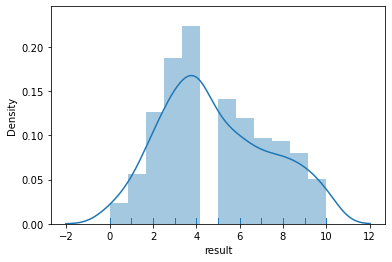

In [15]:
sns.distplot(df.result, rug=True, hist=True)

- on constate que la pluspart des individus ont des valeur de result qui tourne autour de la moyenne 4.87

C:\Users\cheri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cheri\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='A1_Score', ylabel='Density'>

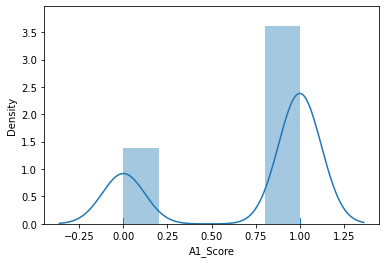

In [16]:
sns.distplot(df.A1_Score, rug=True, hist=True)

- ici nous constatons selon la distribution que presque 15% des patients presente un A1_score entre 0 et 0.25 , 35 % entre 0.75 et 1  

C:\Users\cheri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cheri\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='A2_Score', ylabel='Density'>

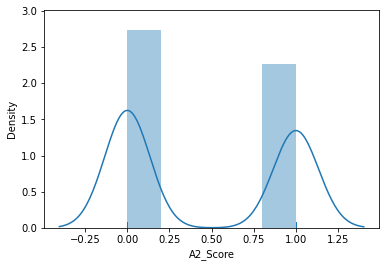

In [17]:
sns.distplot(df.A2_Score, rug=True, hist=True)

approximativement une majorité des individus diagonstiqués presente un score_A2 entre 0 et 0.25 et 0.75 à 1. Cependant certains de ces individus présente une valeur nulle 

C:\Users\cheri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cheri\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='A3_Score', ylabel='Density'>

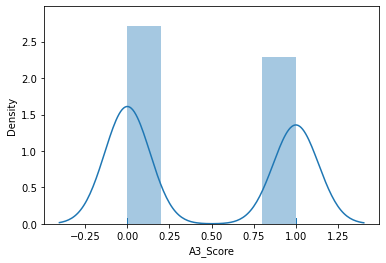

In [18]:
sns.distplot(df.A3_Score, rug=True, hist=True)

C:\Users\cheri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cheri\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='A4_Score', ylabel='Density'>

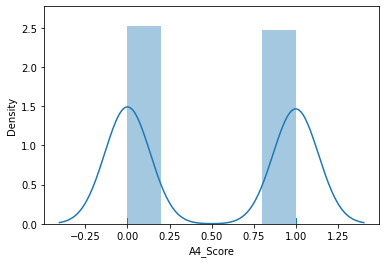

In [19]:
sns.distplot(df.A4_Score, rug=True, hist=True)

C:\Users\cheri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cheri\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='A5_Score', ylabel='Density'>

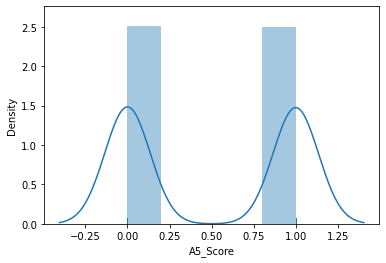

In [20]:
sns.distplot(df.A5_Score, rug=True, hist=True)

Approximativement une majorité des individus diagonstiqués presente un score_A2, score_A3, score_A4, score_A5 entre 0 et 0.25 et 0.75 à 1. Cependant certains de ces individus présente une valeur nulle . Cependant la distribution de nos données ne suivent pas une loi normale ce qui necessitera une normalisation avant la mis en place d'une procedure d'apprentissage 

<AxesSubplot:ylabel='result'>

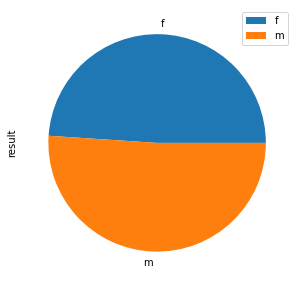

In [21]:
df.groupby("gender")["result"].sum().plot.pie(legend=True, figsize=(5, 5))

Proportionnellement, nous constatons que la proportion des hommes présentant des resultats importants est légere supérieure à celle des femmes.

## Netoyage des données

Ici nous aborderons le pre-processing de notre jeu de données avant la mise la place de la procédure d'apprentissage  

#### Etude des valeurs nulles

In [23]:
import missingno as mno
def showme_mno(df):
    return df.isna().sum()

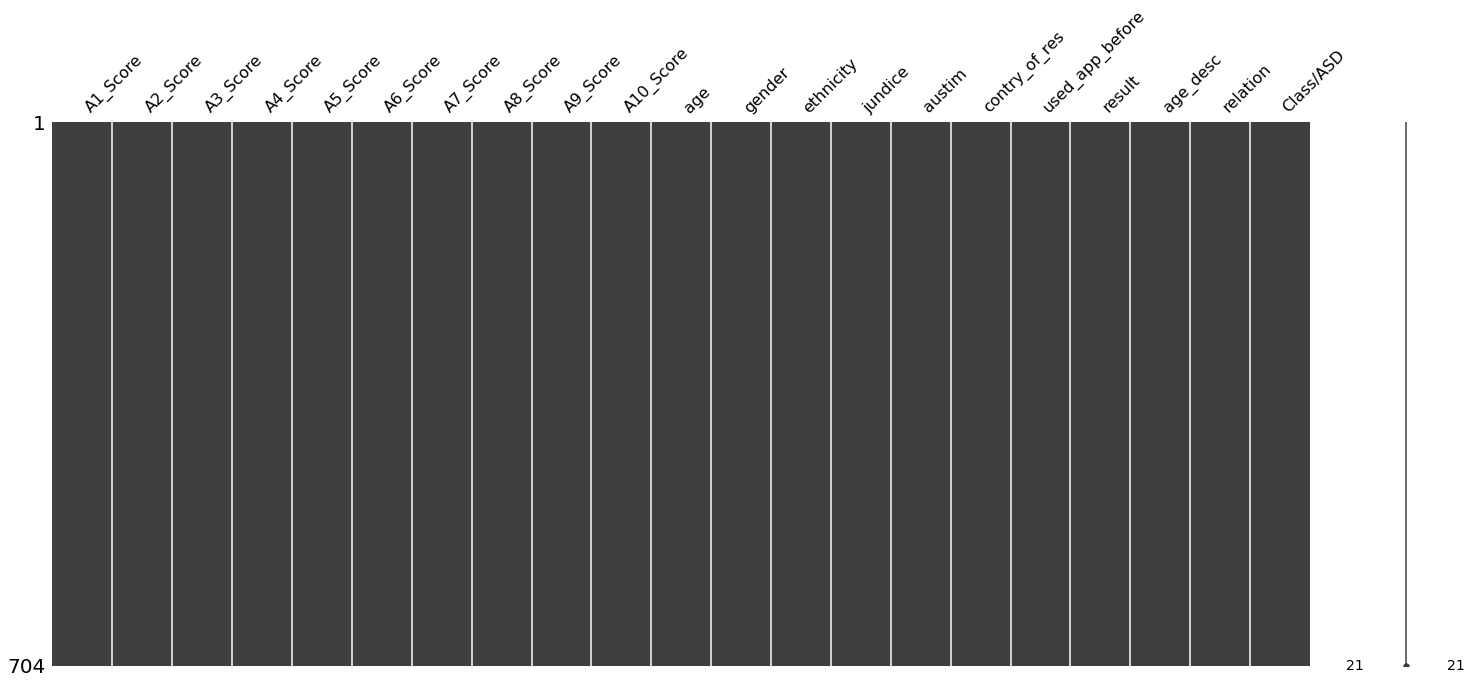

In [24]:
mno.matrix(df);

- Ici nous constatons qu'il n'y a pas de valeur de valeures nulles dans notre jeu de données

### Etude des valeurs manquantes ( Missing Values)

- Dans cette section nous traiterons les données manquantes

Toujours dans le traitement des valeurs manquantes, nous adoptons la stratégie d'imputation vue en cours enfin de nettoyer proprement notre jeu de données.
Dans ces stratégies d'imputation nous avons adopté la strategie de simpleImputation disponible dans le module sklearn.

In [25]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(strategy='constant', fill_value=1, add_indicator=True)
imp_mean.fit_transform(df)

array([[1, 1, 1, ..., "'18 and more'", 'Self', 'NO'],
       [1, 1, 0, ..., "'18 and more'", 'Self', 'NO'],
       [1, 1, 0, ..., "'18 and more'", 'Parent', 'YES'],
       ...,
       [1, 0, 1, ..., "'18 and more'", '?', 'YES'],
       [1, 0, 0, ..., "'18 and more'", 'Self', 'NO'],
       [1, 0, 1, ..., "'18 and more'", 'Self', 'YES']], dtype=object)

In [26]:
indexNames = df[df['relation'] == '?'].index

# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)


In [27]:
indexName2 = df[df['ethnicity'] == '?'].index

# Delete these row indexes from dataFrame
df.drop(indexName2 , inplace=True)

In [28]:
indexName3 = df[df['age'] == '?'].index

# Delete these row indexes from dataFrame
df.drop(indexName3 , inplace=True)

## Encodage des données

Certaines features de notre dataset sont des variables categoricielles. Cependant, nous aborderons l'encodage des ces variables en des valeurs numériques pour preparer notre jeu de données avant de mettre en place notre modele d'apprentissage 

la fonction ci-dessous effectue l'encodage de nos variables cathegoricelles. En effet, elle recupère toutes les varibles cathegoricielles de notre dataset verifie s'ils sont des objets si c'est le cas nous convertissons le type puis l'encoder.
On ne conserve que la variable cible (Class/ASD) en une variables cathegorielle(No,YES) .

In [30]:
#df = pd.get_dummies(df, columns=['age_desc', 'gender', 'jundice', 'austim', 'contry_of_res', 'used_app_before'])

columCategory = ['gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation']
for col in columCategory:
    if(df[col].dtype == 'object'):
        df[col] = df[col].astype('category')
        df[col] = df[col].cat.codes
        
# On conserve Class/ASD comme variable categorielle
df['Class/ASD'] = df['Class/ASD'].replace([0,1],['NO','YES'])

df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,0,9,0,0,9,0,6,0,4,NO
1,1,1,0,1,0,0,0,1,0,1,...,1,5,0,1,22,0,5,0,4,NO
2,1,1,0,1,1,0,1,1,1,1,...,1,5,1,1,54,0,8,0,2,YES
3,1,1,0,1,0,0,1,1,0,1,...,0,9,0,1,9,0,6,0,4,NO
5,1,1,1,1,1,0,1,1,1,1,...,1,6,1,0,9,0,9,0,4,YES


In [31]:
# convertir le type de la varible age en int64
df['age'] = df['age'].astype('int64')

### Etude des valeurs abberantes

##### Visualisation des outliers

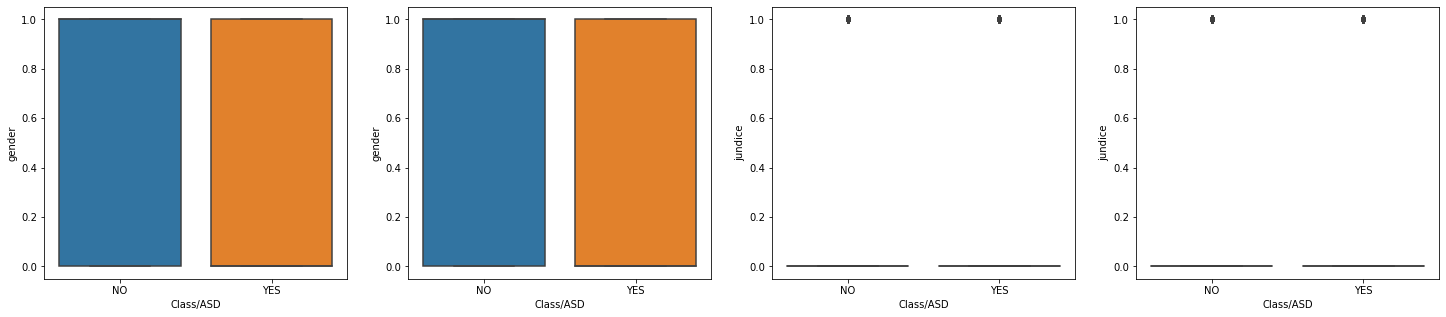

In [32]:
plt.figure(figsize=(25,5))
plt.subplot(1,4,1)
sns.boxplot(x='Class/ASD',y='gender', data=df)
plt.subplot(1,4,2)
sns.boxplot(x='Class/ASD',y='gender', data=df)
plt.subplot(1,4,3)
sns.boxplot(x='Class/ASD',y='jundice', data=df)
plt.subplot(1,4,4)
sns.boxplot(x='Class/ASD',y='jundice', data=df);

In [33]:
def find_all_outlier(v):
    Q1 = np.quantile(v, 0.25)
    Q3 = np.quantile(v, 0.75)
    EIQ = Q3 - Q1
    LI = Q1 - (EIQ*1.5)
    LS = Q3 + (EIQ*1.5)
    i = list(v.index[(v < LI) | (v > LS)])
    val = list(v[i])
    return i, val

In [34]:
outliers_result = find_all_outlier(df['result'])
outliers_result1 = find_all_outlier(df['age'])

Nous avons implémenté la fonction find_all_outlier() qui permet de determiner les valeurs extremes (outliers), de recuperer et de les supprimer de notre jeu de données. Cette implmentation est basée sur le fonctionnement de diagramme à moustache qui graphiquement detecte les outliers .

A l'issue de l'applicationde notre methode nous pouvons dire que :
- nous ne contatons pas de valeurs abberantes dans notre jeu de données

Maintenant que notre jeu de données est propre, nous pouvons passer à la mis en place du modele predictif

## Apprentissage du modele predictif

### découpage du jeu de données

In [35]:
X =df.drop(['Class/ASD'], axis=1).values
Y = df['Class/ASD'].values

## Applicatin de l'algorithme K-NN 

L'algorithme des k plus proches voisins (KNN) est un algorithme de machine learning qui appartient à la classe des algorithmes supervisés. En effet, c'est un algorithme très utilisé avec les problèmes de classification et de regression.\\

### Methode de la validation croisée

- La validation croisée est une strategie qui permet d'entrainer un modele de machine learning basée sur une méthode d’estimation de fiabilité d’un modèle fondé sur une technique d’échantillonnage.Nous appliquons cette methodologie car elle nous permet d'avoir des modeles plus performant en choisissant les meilleurs hyperparametres de notre modele à l'issue de l'apprentissage   sur un ensemble de valeurs definies.

### Standardisation des données

- la standardisation consiste à normaliser les données c'est à dire rendre les valeurs des attributs dans les memes echelles de grandeur.

In [36]:
#definition des hyper-parametres 
p_k = [1, 5, 10, 15, 20, 25]

In [37]:
#train_test_split
X_av, X_t, Y_av, Y_t = train_test_split(X, Y, test_size=0.5)

In [38]:
#creation de standardiseur
scaler = StandardScaler()

In [39]:
X_av_scaled = scaler.fit_transform(X_av)

In [40]:
X_av_scaled 

array([[ 0.5976143 , -0.92393644,  1.0751876 , ...,  1.56918751,
         0.        ,  0.33243124],
       [-1.67332005,  1.08232554, -0.93007025, ..., -1.64045423,
         0.        ,  0.33243124],
       [ 0.5976143 ,  1.08232554,  1.0751876 , ...,  1.97039273,
         0.        ,  0.33243124],
       ...,
       [ 0.5976143 ,  1.08232554, -0.93007025, ..., -0.03563336,
         0.        ,  0.33243124],
       [ 0.5976143 ,  1.08232554, -0.93007025, ..., -0.43683858,
         0.        ,  0.33243124],
       [ 0.5976143 , -0.92393644, -0.93007025, ...,  0.76677708,
         0.        ,  0.33243124]])

In [41]:
X_t_scalled = scaler.transform(X_t)

In [42]:
#Construire  k=5 sous ensemble
from sklearn import neighbors, metrics

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[1, 5, 10, 15, 20, 25],
             'metric' : ['euclidean', 'manhattan']}
# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

In [43]:
from sklearn import model_selection
# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur k_NN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

In [44]:
# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_av_scaled, Y_av)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 5, 10, 15, 20, 25]},
             scoring='accuracy')

In [45]:
# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'metric': 'manhattan', 'n_neighbors': 25}


In [46]:
# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )


Résultats de la validation croisée :
accuracy = 0.914 (+/-0.043) for {'metric': 'euclidean', 'n_neighbors': 1}
accuracy = 0.951 (+/-0.055) for {'metric': 'euclidean', 'n_neighbors': 5}
accuracy = 0.957 (+/-0.026) for {'metric': 'euclidean', 'n_neighbors': 10}
accuracy = 0.961 (+/-0.044) for {'metric': 'euclidean', 'n_neighbors': 15}
accuracy = 0.964 (+/-0.038) for {'metric': 'euclidean', 'n_neighbors': 20}
accuracy = 0.970 (+/-0.038) for {'metric': 'euclidean', 'n_neighbors': 25}
accuracy = 0.934 (+/-0.072) for {'metric': 'manhattan', 'n_neighbors': 1}
accuracy = 0.964 (+/-0.013) for {'metric': 'manhattan', 'n_neighbors': 5}
accuracy = 0.961 (+/-0.049) for {'metric': 'manhattan', 'n_neighbors': 10}
accuracy = 0.977 (+/-0.033) for {'metric': 'manhattan', 'n_neighbors': 15}
accuracy = 0.970 (+/-0.032) for {'metric': 'manhattan', 'n_neighbors': 20}
accuracy = 0.980 (+/-0.032) for {'metric': 'manhattan', 'n_neighbors': 25}


La meilleure performance (~0.972) est ici atteinte avec 25 voisins.

Concernant l'apprentissage et la selection du meilleure valeur de k, nous avons utilisé la methode d'optimisation GridSearchCV de sklearn. L'ensemble d'entrainement est divisé en 5 echantillons qui vont servir à tour de role le jeu de validation lors de l'apprentissage. Ainsi, nous avons obtenu ces resultats ci dessus :
- Nous avons obtenu le meilleur modele avec la valeur de k=25.
- une precision globale de 97.20\%

In [47]:
#la performance sur le jeu de test
y_pred_test = clf.predict(X_t_scalled)
print("\nSur le jeu de test : {:.3f}".format(metrics.accuracy_score(Y_t, y_pred_test)))


Sur le jeu de test : 0.980


En regardant les performances sur le jeu de données test, on constate que le modele offre une precision de 98% sur le jeu de données Teste (X_t), très proche de la performance obtenue lors de l'apprentissage du modele (97.20%) ce qui prouve exactement que notre modele a une capacité de generalisation satisfaisante sur des données de teste.

In [48]:
best_model = clf.best_estimator_

In [49]:
New_Y_t_pred = best_model.predict(X_t_scalled)

In [50]:
print(classification_report(Y_t, New_Y_t_pred))

              precision    recall  f1-score   support

          NO       0.99      0.99      0.99       213
         YES       0.97      0.97      0.97        92

    accuracy                           0.98       305
   macro avg       0.98      0.98      0.98       305
weighted avg       0.98      0.98      0.98       305



### Visualisation des limites de décision du classificateur k-NN

In [51]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

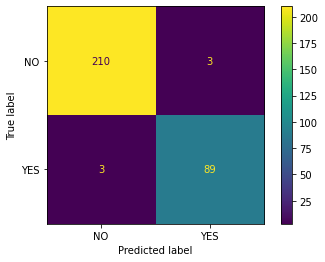

In [52]:
plot_confusion_matrix(best_model, X_t_scalled, Y_t)

En visualisant notre classifcation report et notre matrix de confusion, nous confirmons effectivement que notre modèle présente des resultats satisfaisantes.En effet, les performances du modèle sur le jeu de données test donne de bons resultats sur la précision, le rappel et f1-score. Ce qui témoigne une bonne capacité de généralisation du modèle sur des données autres que celle utilisées lors de l'apprentissage.

## Applicatin de l'algorithme des forets aleatoires (RandomForest)

L’algorithme des « forêts aléatoires » (ou Random Forest parfois aussi traduit par forêt d’arbres décisionnels) est un algorithme de classification qui réduit la variance des prévisions d’un arbre de décision seul, améliorant ainsi leurs performances. Pour cela, il combine de nombreux arbres de décisions dans une approche de type bagging.

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rfc_model = RandomForestClassifier(n_estimators=1000)

In [55]:
#definition de nos partition
#train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [56]:
#creation de standardiseur
scaler2 = StandardScaler()

In [57]:
X_train_scaled = scaler.fit_transform(X_train)

In [58]:
X_test_scalled = scaler.transform(X_test)

In [59]:
#Mis en place du modele
rfc_model = rfc_model.fit(X_train_scaled, Y_train)

In [60]:
#Selection des features les plus pertinentes pour notre modele
from sklearn.feature_selection import SelectFromModel

In [61]:
model = SelectFromModel(rfc_model, prefit=True, threshold=0.3)
X_train_scalled = model.transform(X_train)
X_train_scaled.shape

(487, 20)

In [62]:
from sklearn.metrics import accuracy_score
import timeit

In [63]:
start_time = timeit.default_timer()
prediction = rfc_model.predict(X_test_scalled)
elapsed = timeit.default_timer() - start_time
time = elapsed
out_accuracy = accuracy_score(Y_test, prediction)

In [64]:
print("La précision du modele:", out_accuracy, "%")

La précision du modele: 1.0 %


l'évaluation de notre modèle nous donne une précision de 100% sur nos données teste ce qui est parfait pour notre modèle car un modèle de prediction prédit au plus la réalité et notre modèle produit des performance proches de la réalité.
le RandomForest devient alors trés performant avec notre jeu de données car il justifie une trés bonne capacité de généralisation de notre modéle sur des données differentes de celles utilisées lors de l'apprentissage.

In [65]:
print("Le temps d'execution :", time, "S")

Le temps d'execution : 0.1077398000000045 S


le temps d'execution de l'algorithme est de 0.14 S 

## Comparaison des deux modeles

Aprés l'experimentation des deux modeles de classification sur le meme jeu de données, nous pouvons comparer les performences des deux modeles :
- nous avons une performance tres satisfaisantes avec l'algorithme K-NN appliqué avec la cross validation surtout avec la maitrise d'avoir les meilleurs parametres du modele parcontre le RandomForest founit de meilleurs resultas par rapport aux K-NN meme si nous avions de trés bonne performances avec le K_NN.
- Nous constatons également qu'il y'a un compromis entre les performances du modèle de RandomForest et son temps d'execution alors que le K-NN avec la cross determinent les meilleurs performances du modèle avec ces parametres (K) prédifinis.

# Conclusion

Pour un choix personel, l'algorithme de RandomForest nous semble etre plus efficace et plus pertinent d'aprés les resultats obtenus.En outre, le RandomForest optimise la memoire utilisée qui reste proportionnelles à la taille des arbres, avec surtout une estimation de l'importance des features dans la création des arbres de decisions.Cependant, les RandomForest présentent un probleme majeur celui de l'overfitting car si l'arbre grandit largement, il peut absorber du bruit et facilement overfitter ce qui impactera considerablement sur la prise de décision.
L'algorithme K-NN reste l'un des algorithme trés célèbre et trés utilisé dans la classification grace à sa ficilité et sa simplicité de mis en place.Cependant, il est non deterministe car ses performances sont relativement lié au parametres du modèle.
Ainsi le choix reste arbitraire, à nous maintenant de bidouiller afin d'améliorer les performances du modèle finale en modifiant et gerant les différents hyperparamètres de contrôle et trouver la bonne balance entre performances de classification /temps de calcul (RandomForest) en particulier et d'autres objectif que nous nous fixons à priori.